In [4]:
# Step 1. Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2. Load data
df = pd.read_csv("snap_qc_data_2017to2023.csv", encoding = "latin1")

# Step 3. Keep only needed columns
keep_cols = ['State', 'Year', 'Error Element']
df = df[keep_cols].copy()

# Step 4. Drop missing values & clean datatypes
df = df.dropna(subset=['State', 'Year', 'Error Element'])
df['Year'] = df['Year'].astype(int)

print("Cleaned data shape:", df.shape)
print(df.head())



Cleaned data shape: (72072, 3)
         State  Year       Error Element
0  Connecticut  2017  Wages and salaries
1  Connecticut  2017   Shelter deduction
2  Connecticut  2017  Wages and salaries
3  Connecticut  2017  Wages and salaries
4  Connecticut  2017  Wages and salaries


In [12]:
def plot_state_error_element_trend(state_name, df):
    
    # filter the data for certain state
    state_df = df[df['State'] == state_name].copy()
    if state_df.empty:
        print(f"No data found for state: {state_name}")
        return

    # aggregate by year × error element
    agg = state_df.groupby(['Year', 'Error Element']).size().reset_index(name='count')


    # order the legend
    last_year = df['Year'].max()
    order = (
        agg[agg['Year'] == last_year]
        .sort_values('count', ascending=False)
        ['Error Element']
        .tolist()
    )

    # draw the plot
    plt.figure(figsize=(12, 6))
    palette = sns.color_palette("husl", len(order))

    for i, elem in enumerate(order):
        sub = agg[agg['Error Element'] == elem]
        years = sub['Year'].values
        counts = sub['count'].values

        for j in range(1, len(years)):
            if not np.isnan(counts[j-1]) and not np.isnan(counts[j]):
                plt.plot(years[j-1:j+1], counts[j-1:j+1],
                         color=palette[i], linewidth=1.6)
        # note the last year on the graph
        if not np.isnan(counts[-1]):
            plt.text(years[-1] + 0.1, counts[-1],
                     elem if i < 5 else "",  # only for the Top5
                     fontsize=8, color=palette[i], va='center')

        # draw the points
        plt.scatter(years, counts, s=15, color=palette[i])

    plt.title(f"{state_name}: Error Element Trends ({df['Year'].min()}–{df['Year'].max()})")
    plt.xlabel("Year")
    plt.ylabel("Number of Errors")
    plt.legend(order, title=f"Error Element (sorted by {last_year} count)",
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # output the Top 5 elements
    print(f"\nTop 5 Error Elements in {state_name} (year {last_year}):")
    top5 = (
        agg[agg['Year'] == last_year]
        .sort_values('count', ascending=False)
        .head(5)
    )
    print(top5[['Error Element', 'count']])


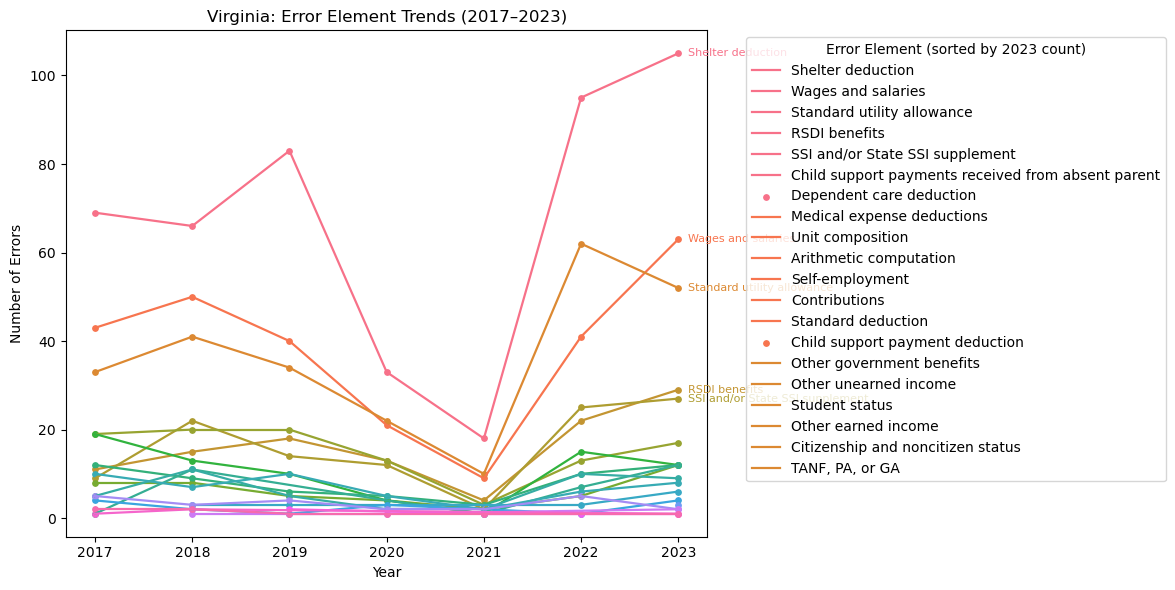


Top 5 Error Elements in Virginia (year 2023):
                       Error Element  count
124                Shelter deduction    105
130               Wages and salaries     63
126       Standard utility allowance     52
121                    RSDI benefits     29
122  SSI and/or State SSI supplement     27


In [14]:
# try to run the function
plot_state_error_element_trend("Virginia", df)